<a href="https://colab.research.google.com/github/dips1400/sentimental_analysis/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

Adding libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re, string, unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

Loding data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Book2.csv',encoding='latin-1')

In [ ]:
df.head()

,ï»¿Ratings,Reviews,Movies,Resenhas
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie,* IsenÃÂ§ÃÂ£o de responsabilidade: eu sÃÂ³ ...
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie,Estou escrevendo isso na esperanÃÂ§a de que i...
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie,"Realmente, eu poderia escrever uma crÃÂ­tica ..."
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie,Se vocÃÂª viu os outros filmes falsificados a...
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie,Este filme eu vi um dia cedo de graÃÂ§a e ain...


Data cleaning and processing


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["movie", "one","film","would", "shall", "could", "might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words = set(stop_words)

Data cleaning and preprocessing pipeline

In [ ]:
def remove_special_character(content):
  return re.sub('\[[^&@#!]]*\]','',str(content))

def remove_url(content):
  return re.sub(r'http\S+','',str(content))

def remove_stopwords(content):
  clean_data = []
  for i in content.split():
    if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
      clean_data.append(i.strip().lower())
  return " ".join(clean_data)

def contraction_expansion(content):
  content = re.sub(r"won\'t","would not",str(content))
  content = re.sub(r"can\'t","can not",str(content))
  content = re.sub(r"don\'t","do not",str(content))
  content = re.sub(r"shouldn\'t","should not",str(content))
  content = re.sub(r"needn\'t","need not",str(content))
  content = re.sub(r"hasn\'t","has not",str(content))
  content = re.sub(r"haven\'t","have not",str(content))
  content = re.sub(r"weren\'t","were not",str(content))
  content = re.sub(r"mightn\'t","might not",str(content))
  content = re.sub(r"didn\'t","did not",str(content))
  content = re.sub(r"n\'t","not",str(content))
  content = re.sub(r"\'s","is",str(content))
  content = re.sub(r"\'d","would",str(content))
  content = re.sub(r"\'ll","will",str(content))
  content = re.sub(r"\'t","not",str(content))
  content = re.sub(r"\'ve","have",str(content))
  content = re.sub(r"\'m","am",str(content))
  return content

# data preprocessing
def data_cleaning(content):
  content = remove_special_character(content)
  content = remove_url(content)
  content = contraction_expansion(content)
  content = remove_stopwords(content)
  return content

In [ ]:
# data cleaning
df['Reviews'] = df['Reviews'].apply(data_cleaning)
df['Reviews'].head(5)
df.head()

,ï»¿Ratings,Reviews,Movies,Resenhas
0,1.0,watched conditional see films wouldnot caught ...,Disaster Movie,* IsenÃÂ§ÃÂ£o de responsabilidade: eu sÃÂ³ ...
1,1.0,writing hopes gets put previous review anyone ...,Disaster Movie,Estou escrevendo isso na esperanÃÂ§a de que i...
2,1.0,write scathing review turd iam going making ob...,Disaster Movie,"Realmente, eu poderia escrever uma crÃÂ­tica ..."
3,1.0,saw previous spoof movies two horrible know al...,Disaster Movie,Se vocÃÂª viu os outros filmes falsificados a...
4,1.0,saw day early free still feel like got ripped ...,Disaster Movie,Este filme eu vi um dia cedo de graÃÂ§a e ain...


Data overview

In [ ]:
df.isna().sum()

ï»¿Ratings     1
Reviews        0
Movies         0
Resenhas      22
dtype: int64

In [ ]:
df.rename(columns={'ï»¿Ratings': 'Ratings'}, inplace=True)
df.head()

,Ratings,Reviews,Movies,Resenhas
0,1.0,watched conditional see films wouldnot caught ...,Disaster Movie,* IsenÃÂ§ÃÂ£o de responsabilidade: eu sÃÂ³ ...
1,1.0,writing hopes gets put previous review anyone ...,Disaster Movie,Estou escrevendo isso na esperanÃÂ§a de que i...
2,1.0,write scathing review turd iam going making ob...,Disaster Movie,"Realmente, eu poderia escrever uma crÃÂ­tica ..."
3,1.0,saw previous spoof movies two horrible know al...,Disaster Movie,Se vocÃÂª viu os outros filmes falsificados a...
4,1.0,saw day early free still feel like got ripped ...,Disaster Movie,Este filme eu vi um dia cedo de graÃÂ§a e ain...


In [ ]:
df['Ratings'].describe()

count    998.000000
mean       5.507014
std        2.871967
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Ratings, dtype: float64

In [ ]:
df['Reviews'].describe()

count     999
unique    978
top       nan
freq       22
Name: Reviews, dtype: object

In [ ]:
print('Unique reviews:%s' % df.Reviews.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:978
Unique movie names:421
No of ratings:998


Exploratory Data Analysis

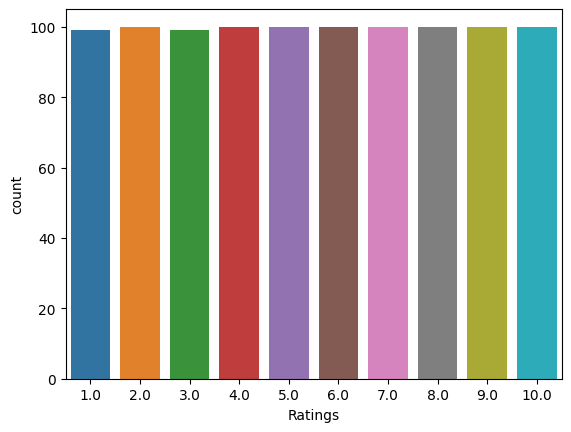

2.0     100
4.0     100
5.0     100
6.0     100
7.0     100
8.0     100
9.0     100
10.0    100
1.0      99
3.0      99
Name: Ratings, dtype: int64


In [ ]:
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

(-0.5, 1499.5, 799.5, -0.5)

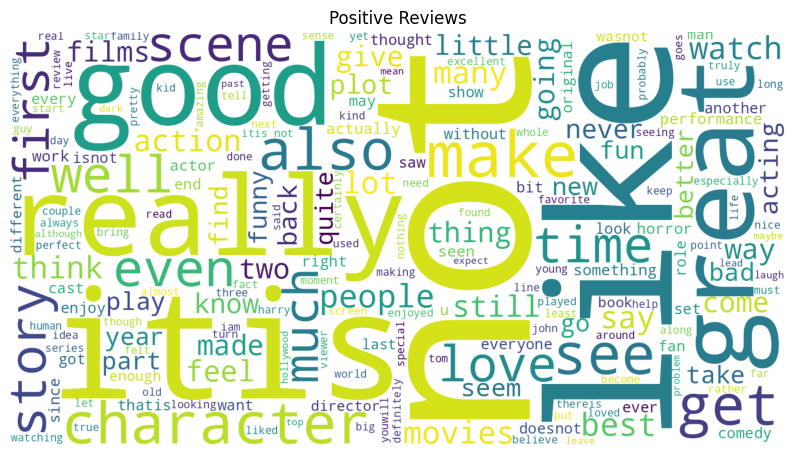

In [ ]:
'''--------Visualization of Important words from positive reviews---------'''
sentences = df['Reviews']
pos = ' '.join(map(str,sentences[df['Ratings']>=7]))
neg = ' '.join(map(str,sentences[df['Ratings']<=4]))

pos_wordcloud = WordCloud(width=1500,height=800,
                          background_color='white',
                          stopwords = stop_words,
                          min_font_size=15).generate(pos)

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

(-0.5, 1499.5, 799.5, -0.5)

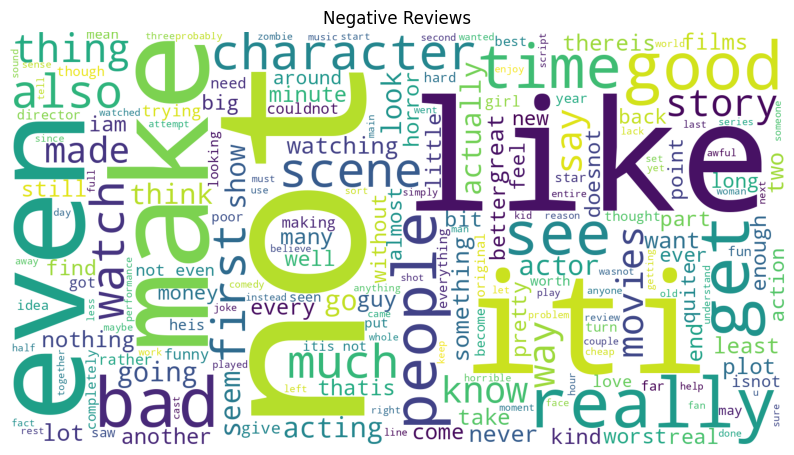

In [ ]:
'''--------Visualization of Important words from negative reviews---------'''
sentences = df['Reviews']
pos = ' '.join(map(str,sentences[df['Ratings']>=7]))
neg = ' '.join(map(str,sentences[df['Ratings']<=4]))

pos_wordcloud = WordCloud(width=1500,height=800,
                          background_color='white',
                          stopwords = stop_words,
                          min_font_size=15).generate(neg)

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')

Statistic of review data

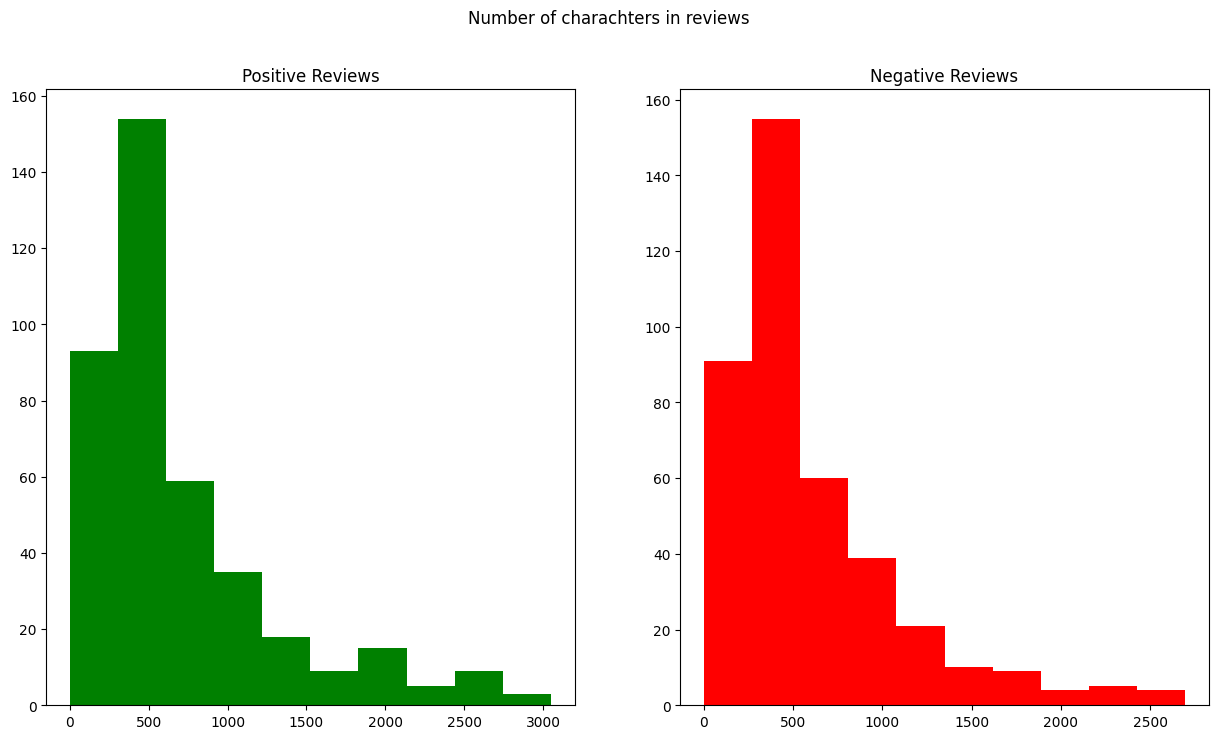

In [ ]:
figure,(pos_ax,neg_ax) = plt.subplots(1,2,figsize=(15,8))
len_pos_review = df[df['Ratings']>=7]['Reviews'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review = df[df['Ratings']<=4]['Reviews'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of charachters in reviews')
plt.show()

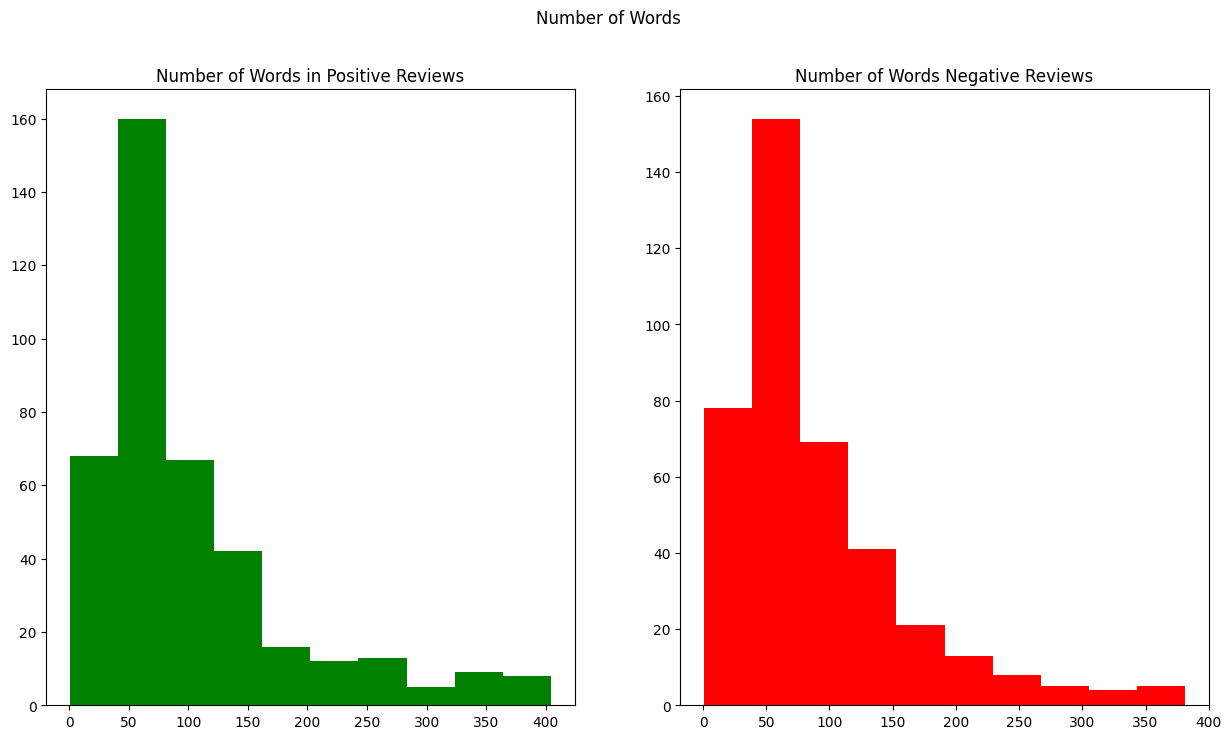

In [ ]:
#Visulaization of number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of Words Negative Reviews')
figure.suptitle('Number of Words')
plt.show()

Text(0.5, 0.98, 'Average word length in reviews')

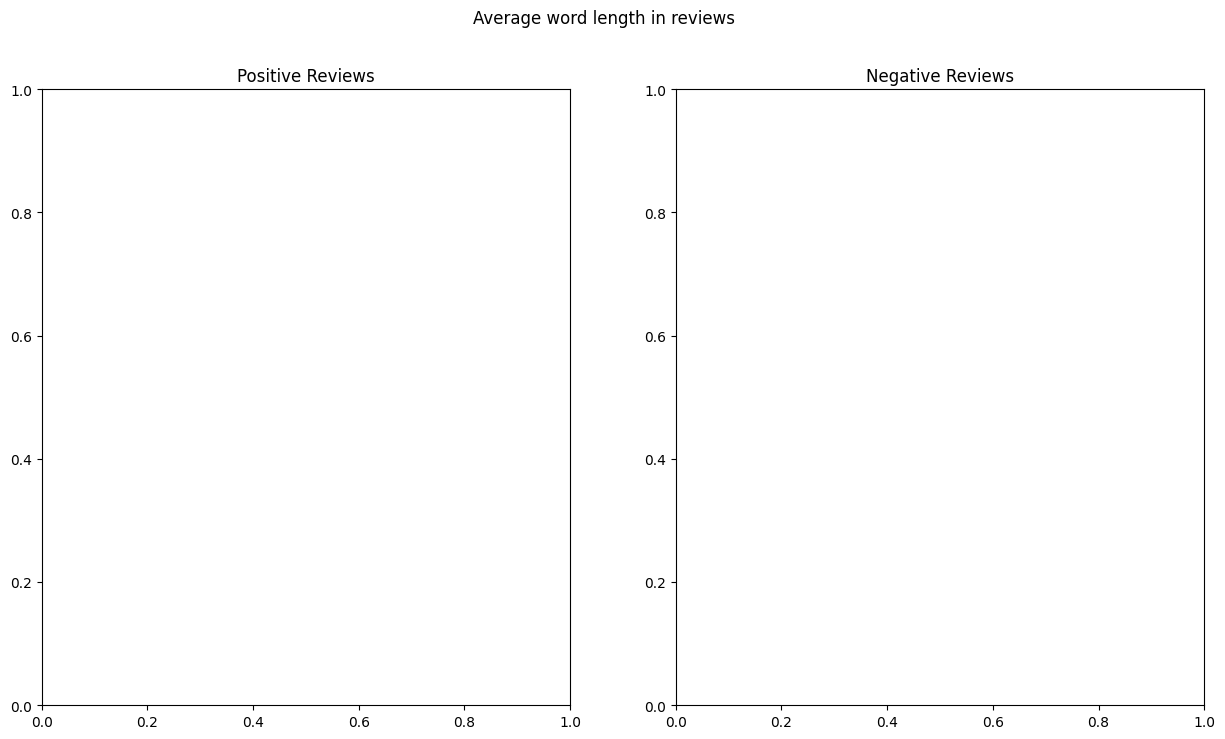

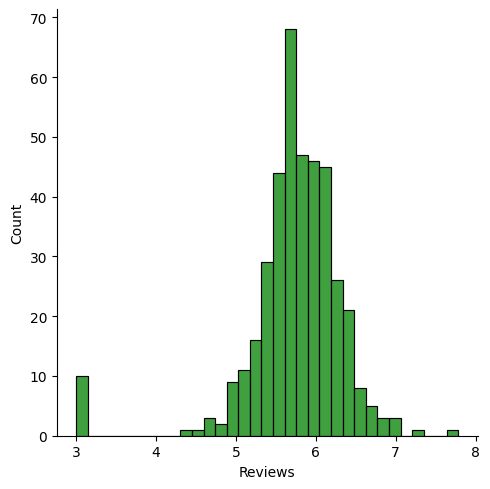

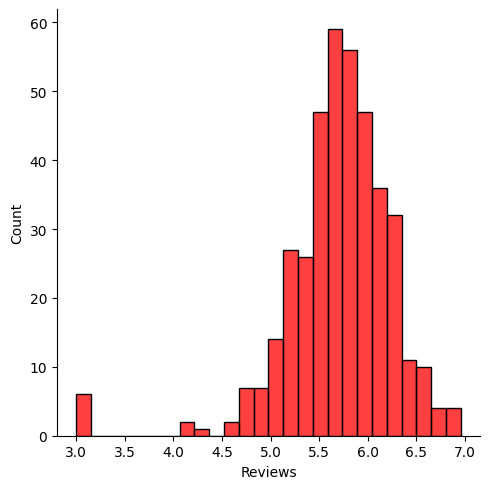

In [ ]:
#visulaize average of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word = df[df['Ratings']>=7]['Reviews'].str.split().apply(lambda x : [len(i) for i in x])
sns.displot(pos_word.map(lambda x : np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews'].str.split().apply(lambda x : [len(i) for i in x])
sns.displot(neg_word.map(lambda x : np.mean(x)),ax = neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in reviews')

In [ ]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not like| not want| not big fan"))].head(30)

,Reviews,Ratings,Movies
613,undergroundis basically personal home video two sociopathic killers murder two nameless butchers played fred vogel cristie whiles videotape bloodthirsty shows also slow iam not big fan lover extreme cinema previously seen undergroundis really wanted see final time look mordum tossed aside favor contemporary digital gore effects made toetag crew convincing violence dirty boring overall not perverted repulsive,7.0,August Underground's Penance
625,ok hereis deal late saturday night went video store new movies rented seen not like head middle store movies take best shot go direct video movies oldies kind like mystery bottom shelf called rediscovery picked wasnot hopping much something kill saturday plus dom deloise roddney thought fun watch comic masters hey day johnny carson tonight show ended watching take godfather bad gangster movies lot jokes really bad dead drop middle stoped actually paid attention good liked sides audiences started take place blue halfway favorite part sucker breaking third wall stage lot better maybe play straight not go low humor went hand jokes worked mafia great idea made results toward nice see roddney dangerfield comic mastermind still reading going recommendation seeing not say give shot not give movies middle video store chance middle video store like box choclates never know going,7.0,The Godson
657,think address important never read not read comparisons critiques left done wrong went aware subject matter judged like consider fair review shades liked know guy likes seeing people kinky sex big think mainstream erotic films offer us artsy fascinating look human subconscious like wide pure garbage like come learn art not safe whether itis horror comedy especially erotic found shades provocative questions passion even borders people consider bad basically follows relationship inhibited english student named anastasia steele dakota young billionaire named christian grey jamie meet interview begin building infatuation another grey keeps insisting not want romance instead offers chance partake bdsm relationship dominant look roles match well real story find rather itis lot great movies focus characters works many supporting characters snubbed two main players say sake maybe others found greyis lifestyle caught media substantial found dakota johnson incredibly dull first act gradually...,7.0,Fifty Shades of Grey
669,say means kind crazy filled weird crazy shots action scenes editing plus crazy acting nicolas expect two guys behind gamer crank never understand action directors like shake camera hard like mad bull action scene dialogue camera perfectly directors make mistake although not not imagine like watch made wise choice not catch fairly simple chase group bad guys want catch motheris doesnot say middle johnny blaze known ghost hiding asked blah story goes people chasing people thing improvement first features cool action ghost rider comes like watching found footage not exactly see cgi directors injected sense weird even weirder first get entertaining become although camera shots prefer less frenetic crazily shaking purely not like first probably not like second although features story really kind straight forward also time saw reviews stating worst superhero not something not really seen superhero superhero crazy camera shots crazy weird not say hate directors like third directed different,7.0,Ghost Rider: Spirit of Vengeance
687,engaging effort find good review much harder ever imagined finding listed bottom felt almost obligation go see opening day either prove critics get fodder scathing letter jim ended critics garfield old walk theater revealed new harry years look long listing garfield tv began jim davis believed technology wasnot itis called regular garfield either comics page animated since couldnot problem not necessarily cgi garfield although characteristics displayed not associate problem supporting cast not like animated made odie wiener dog nermal siamese not

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews'].str.contains("bad review"))].head(30)

,Reviews,Ratings,Movies
835,iam sick bad reviews really not give damn itis true iliad extremely really like fact gods downplayed makes story lot acting story dialogue action scenes really not see whatis not like guess pick apart find every ever upset fact definite good side bad shattering never good side bad war subjective depending whose side every side thinks good lot people upset cast becoming heroic like cowardliness heroism within not like admit ignore critics watch critics opinion like everyone else old saying opinions like everyone lot not agree not let someone else make mind,9.0,Troy


In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains("blah | la| mario"))]

,Reviews,Ratings,Movies
0,watched conditional see films wouldnot caught dead giving hard earned money explain depth write shortest donot see far unbelievably unfunny ever total since hatred others like extends far beyond think iwill go not know people besides carmen vanessa kim doesnot though think editing flat possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come itis someone gets minor facial next someone gets cut blood least cut since narnia films away iwill give disaster pass thoughtless mindless physical gags obviously take popular movies last year late including best picture know saddest thing stupid movies not care much money many cameos sorry ass excuses films taking away jobs directors truly deserve thought better taste ashamed making kind jason friedberg aaron burn guys contributing decline western cause downfall western,1.0,Disaster Movie
1,writing hopes gets put previous review anyone find slop entertaining completely beyond first spoof entitled indeed spoof disaster seen count disaster iron alvin amy hancock register disaster selzterwater failburg shown lack sort writing skill unfortunately tortured date epic know exactly expect jokes bad references cheaply remade scenes someone informed satire copy paste though not say actually seem taken nothing clever witty remotely smart way two not believe people still pay see itis insult though enjoy films doubt smart enough realize unfortunately not number low enough includes rate deserves top worst films right date epic mean meet rather forced hour hands marathon watch,1.0,Disaster Movie
2,write scathing review turd iam going making observations points ihave point watching movies reader remember scary remember original comedic elements funny pretty forgettable worth price last time premise stop making call boycott pieces monkey know thereis going line pre pubescent annoying little spouting crappy liners rick james movies continue make form monetary considering production value looks like cost cents see donot spend money go rent laugh ass silently judge people talking,1.0,Disaster Movie
3,saw previous spoof movies two horrible know already iwill tell want watch brainless person meant stereotypical laugh judge even automatically never ask comes two good old hollywood days whenever making showing people type also story kept edge well whenever word hit making films earned loads greedy people came picture quite two still artists notably genius christopher two guys ihave writing big let put simple terms guys not instead money craving latest proves even fails easily mind mean nothing funny people usually put best stuff idiots knew going made bet wasnot good idea write reviews paper tell everyone whats good whats flipped review well iam warning not even called nothing artistic references made throughout pretty much like hannah montana juno gig actually close spoofing failed referencing instead joking twisting random wrestling not know high respect high respect know not something doesnot add story nudity not really needed closest still wouldhave gotten idea saw bare hate gi...,1.0,Disaster Movie
4,saw day early free still feel like got ripped totally brain kicking groin boobs wrong films like even get parodies plot lackluster best acting transparent really quite see remember academy awards well not seen rancid crappy scary movies least decent makes nice call year falling ihave wasted even life typing sack cow not see unless course iq r,1.0,Disaster Movie
...,...,...,...
385,admiral general aladeen baron dictator fictitious north african republic attempts build nuclear weapons announced summoned un explain countryis new york betrayed attempt made escaping discovers replaced double finds working shared earth coop becomes friends zoey aladeen uses coop try regain identity grip power baron cohen moved away mocumentary style become synonymous dictator mostly played straight forward comedy character aladeen based hodgepodge various re

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon unigram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],50,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],50,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],50,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains("good|great"))].head(100)

,Reviews,Ratings,Movies
3,saw previous spoof movies two horrible know already iwill tell want watch brainless person meant stereotypical laugh judge even automatically never ask comes two good old hollywood days whenever making showing people type also story kept edge well whenever word hit making films earned loads greedy people came picture quite two still artists notably genius christopher two guys ihave writing big let put simple terms guys not instead money craving latest proves even fails easily mind mean nothing funny people usually put best stuff idiots knew going made bet wasnot good idea write reviews paper tell everyone whats good whats flipped review well iam warning not even called nothing artistic references made throughout pretty much like hannah montana juno gig actually close spoofing failed referencing instead joking twisting random wrestling not know high respect high respect know not something doesnot add story nudity not really needed closest still wouldhave gotten idea saw bare hate gi...,1.0,Disaster Movie
6,given free ticket not complain ripped minutes life irretrievably stolen sort movies epic meet not funny time reached new wasnot real laugh anywhere alleged actually considerable amount stuff form especially garbage along ample helpings juvenile none actors even bothering put pretense nothing even mildly intelligent going entire beginning end utterly humorless human know past sort trash made enough money keep seltzer et grinding may downfall utter contempt seltzer collaborators audience finally beginning show fails saw almost empty theater good chance seltzer go back drawing stop making lazy finally develop real sense unfunny piece puke stay away,1.0,Disaster Movie
7,isnot imaginative barb thereis not shred wit saw friend said trailer free think heis spoof disaster movies not couple disaster movies get not really recent movies aspects current current womenis wrestling thereis anything thatis thereis minute running time get nicole parker seems like good,1.0,Disaster Movie
11,decided go see hoping bad become cant take kid confirmed jb ego even bigger kayne entire iam talented singer good simply nothing not forgot mention mommies fat cigar smoking managers made heis make look buried iam starting think done purpose fat cats want get rid not,1.0,Justin Bieber: Never Say Never
12,right everyone imdb pretty much committed giving call get bottom trust went see knew way criticize without seeing lacks artistic merit full latest greatest pop sensations youtube names flashy lights stuffing cooked turkey heart presentation message never give however whole bieber looking pretty grooming lesbian mentioned previous theater full tween girls screaming heads every time inhaled someone really needs teach modern generation cinema least tell shut honestly not know trying besides earn money add accolades stars short also,1.0,Justin Bieber: Never Say Never
...,...,...,...
265,annoying movies thinks itis much clever actually kind thinks every single line dialogue supposed people repeating next couple wewill figure less important stuff like plot characters later guess mark lafferty isnot quite everything laughably forced almost becomes long take people even find actors willing utter lines like quiet fairy let line sink made final not even want think lines cut not write decent line dialogue save probably not transform half scenes long conversations barely anything actual power trial error occasionally stumble territory itis almost good get scene peculiar charm moments way far apart make stop hating,3.0,Lower Learning
270,iam still waiting day iwill break duck participate paintball especially going back training every year isnot enough iwill want wield rifle paint go around fragging peers strangers opposite best played big group friends people sport picking specialized shops selling paintball gear sprouting giving indication cost game go terrain little like set fictional redball touted europeis largest renegade paintball give in

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains(" night "))].head(100)

,Reviews,Ratings,Movies
82,ihave seen made uwe knew probably worst director ever always makes films based video games also imdb bottom still wanted watch iam huge fan game wanted see doeis makes watching agree first minutes nothing topless teenage girls brains running moment wondering zombies girls night time zombies popped nowhere started attacking people later woman started shooting mean takes place every supposed knew fell asleep second half woke end credits not manage watch good true insult classic uwe boll please not make thank,1.0,House of the Dead
86,outraged see many sane person ever give grade unrelentinly boring piece itis quite hard not use profanity like people giving manos rival snatch worst title truly manos morally true winner much said not said already since reading imdb getting load laughs feeling complete sense empathy poor souls dared watch knowing exactly coming good thing gotten idea bad movies ed wood movies least provide laughs something coherent look even though realization shoddy humorous entirely different league manos basically feeling mentally raped within first minutes many movies rather purposeless mention favorite strange person deformed whose creation darwinis laws natural selection seem completely gladly deciding spend night touching display affection holding hands bored dead melodramatic puzzlingly wrestling match amongst thoroughly making question previous enjoyment watching massaging someone death look like quite absolutely tasteless complete subsequent cast introduction give sheer hilarity people b...,1.0,Manos: The Hands of Fate
91,watched manos last cocky intrigued attention manos even though years itwill laugh investigate claim worst ever must least comedy value hour warnings true bloody twenty stopped sniggering unimaginable realised twenty minutes passed flicked timer honestly thought closer forty minutes shifting uncomfortably chair wanted submerged pointless angry everyone involved angry cup even god lose faith humanity watching conceivable measure possible aspect manos still gets zero fails utterly every youwill wonder anyone involved creation ever seen even heard films youwill wonder theywould ever even spent day isnot single moment forget people standing front ineptly executing awful scripts ever never insulted form lost count number times beaten head totally obvious lost count number times completely random stuff genesis certainly not lose count number locations number musical count circular saw baffled never realised not shoot night without form music oh not need warn thereis plenty complain withou...,1.0,Manos: The Hands of Fate
121,although iam not sure think copy got store burned incorrectly since sound screwed not since dialog pretty bad generally delivery lines horrible youwould think eternity creature night theywould learn speak properly big teeth not not accidentally funny point van helsing reassures lady love nothing happen since surrounded giants shot cuts right looks sorriest looking bunch ever grace look either hung half plain annoyed go around slaying children night potato nudity not enough make fact vampires look like two dollar sound overall look plain mention sound,2.0,Way of the Vampire
172,aliceis birthday sorority girlfriends throw themed everyone comes sexy character jabberwocky not invited brings murder mayhem night wish love alice wanted like least little costumes definitely need really good horror alice combination awesome video get low video quality average seen much worse acting video least not,2.0,Alice in Murderland
174,not like first zodiac killeris voice repeats vulgarity throughout story zodiac style killings san francisco haunting young woman dreams killings night director must school looks amateurish fast flashes bloody not really impact cast barely recognizable not blame cast poor writing vision making worth watching first victims arenot sympathetic begin psychic dreamer san francisco writer team avail solve identity supposed help us interested zo

Feature Engineering

In [ ]:
#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
#Removing
df=df[df.Label<'2']
data=df[['Reviews','Label']]
print(data['Label'].value_counts())

1    400
0    398
Name: Label, dtype: int64


In [ ]:
#Importing dependencies for feature engineering
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# lemmatization of word
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews']).toarray()
x_test_count = countvect.transform(test['Reviews']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews']).toarray()
y_train = train['Label']
y_test = test['Label']

Feature Importance with Logistic Regression and Count Vectorizer with unigram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+-----------------------+
|    Feature     |         Score         |
+----------------+-----------------------+
|      able      |  0.05927500944309459  |
|   absolutely   |  0.36586576093086454  |
|     across     |  -0.5051902430008947  |
|      act       |  -0.2991308213820237  |
|     acting     |  -0.7486918048591769  |
|     action     |   1.2078770733054354  |
|     actor      |  -0.13644512652182317 |
|    actress     |  -0.33958888693000583 |
|    actually    |  -0.13867822518518075 |
|      add       |  0.22781170079780214  |
|     admit      |   0.5099828133643053  |
|   adventure    |   0.3293672470763211  |
|     alien      |  0.09409472396301548  |
|     almost     |   0.4128100390707974  |
|     alone      |  -0.01379736541939832 |
|     along      |  0.03735994324668904  |
|    already     |  0.13892738704520416  |
|      also      |  0.25133156513371946  |
|    although    |  0.08645461730166719  |
|     always     |  0.08952382258004112  |
|    amazin

Feature Importance with TFIDF vectorizer and Logistic Regression with Unigram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=100:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+------------------------+
|    Feature     |         Score          |
+----------------+------------------------+
|      able      |   0.3005305273352041   |
|   absolutely   |  0.14217921178843754   |
|     across     |  -0.26060256937314175  |
|      act       |  -0.15553790250958355  |
|     acting     |  -0.7120058282100883   |
|     action     |   1.1234188337439737   |
|     actor      |  -0.6386459823803652   |
|    actress     |  0.010906133242791972  |
|    actually    |  -0.3958225840647485   |
|      add       |  0.20315187126680187   |
|     admit      |  0.48749943293753334   |
|   adventure    |   0.5981047273566648   |
|     alien      |   0.3470382821843978   |
|     almost     |  0.35704444950080955   |
|     alone      |  -0.11750996428415467  |
|     along      |  0.33276899491325884   |
|    already     |  -0.02466196165972586  |
|      also      |   0.6498828253973634   |
|    although    |  -0.03704597542439416  |
|     always     |   0.417913459

Vectorization with Count Vectorizer and TDIDF Vectorizer with Bigram

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews']).toarray()
x_test_count = countvect.transform(test['Reviews']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews']).toarray()
y_train = train['Label']
y_test = test['Label']

Feature Importance with Logistic Regression and Count Vectorizer with Bigram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------+-------------------------+
|     Feature     |          Score          |
+-----------------+-------------------------+
|     can not     |   -0.6083956319124527   |
|  character not  |   -0.3284825730403575   |
|  definitely not |   0.38850283813071507   |
|   even though   |  -0.017877727127926287  |
|    ever seen    |   0.17580334849222584   |
|    feel like    |   -0.2652840244359956   |
|    first time   |    -0.222696895259571   |
|      go see     |    1.000427474978444    |
|     good not    |   0.13743997449842874   |
|   harry potter  |    1.434234010643335    |
|   high school   |    0.2567123507030588   |
|     iam not     |   0.27503411596806915   |
|    ihave ever   |   -0.08984332628259019  |
|    ihave seen   |   0.36284737306386344   |
|     itis not    |   0.17960705633076143   |
|    know itis    |    0.2999559653175829   |
|    look like    |   -1.1956863149070034   |
|   looked like   |   -0.22639887466941677  |
|    low budget   |   -0.253077414

Feature Importance with Logistic Regression and TFIDF Vectorizer with Bigram

In [ ]:
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=50:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+-----------------------+
|    Feature     |         Score         |
+----------------+-----------------------+
|    can not     |  -0.6900809412383736  |
| character not  |  -0.20349666247872544 |
| definitely not |   0.5558715268474083  |
|  even though   |  0.04626105256138485  |
|   ever seen    |  0.052301014205956994 |
|   feel like    |  -0.3344666545967126  |
|   first time   |  -0.17328645490628317 |
|     go see     |   1.1034340882778055  |
|    good not    |   0.3420474136197094  |
|  harry potter  |   1.6473523467627509  |
|  high school   |  0.22582709927984113  |
|    iam not     |   0.5928262057645166  |
|   ihave ever   |  0.07239131781950581  |
|   ihave seen   |   0.4957046284779681  |
|    itis not    |  0.24818937190372736  |
|   know itis    |   0.2751458873476046  |
|   look like    |  -1.6342204073780482  |
|  looked like   |  -0.3695182328514857  |
|   low budget   |  -0.12291627304207753 |
| main character |  -0.5264384625253884  |
|   movie l

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews'].str.contains("bad review"))].head(100)

,Reviews,Ratings,Movies
835,iam sick bad reviews really not give damn itis true iliad extremely really like fact gods downplayed makes story lot acting story dialogue action scenes really not see whatis not like guess pick apart find every ever upset fact definite good side bad shattering never good side bad war subjective depending whose side every side thinks good lot people upset cast becoming heroic like cowardliness heroism within not like admit ignore critics watch critics opinion like everyone else old saying opinions like everyone lot not agree not let someone else make mind,9.0,Troy


Vectorization with Count Vectorizer and TFIDF Vectorizer with Trigram


In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3), min_df=7,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3),min_df=7,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews']).toarray()
x_test_count = countvect.transform(test['Reviews']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews']).toarray()
y_train = train['Label']
y_test = test['Label']

Feature Importance with Logistic Regression and Count Vectorizer with Trigram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------+--------------------+
|    Feature    |       Score        |
+---------------+--------------------+
| iam not going | 0.3450891805359823 |
+---------------+--------------------+


Feature Importance with Logistic Regression and TFIDF Vectorizer with Trigram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------+--------------------+
|    Feature    |       Score        |
+---------------+--------------------+
| iam not going | 0.5360939191682965 |
+---------------+--------------------+


Vectorization with Count Vectorizer and TDIDF Vectorizer with 4-gram

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4), min_df=3,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4),min_df=3,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews']).toarray()
x_test_count = countvect.transform(test['Reviews']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews']).toarray()
y_train = train['Label']
y_test = test['Label']

Feature Importance with Logistic Regression and Count Vectorizer with 4-gram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+---------------------+
|        Feature        |        Score        |
+-----------------------+---------------------+
| itis really not worth | -0.8952515295347282 |
+-----------------------+---------------------+


Feature Importance with Logistic Regression and TDIDF Vectorizer with 4-gram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+---------------------+
|        Feature        |        Score        |
+-----------------------+---------------------+
| itis really not worth | -0.8952515295347282 |
+-----------------------+---------------------+


Vectorization with Count Vectorizer and TDIDF Vectorizer with unigram, bigram and trigram

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=5000)
x_train_count = countvect.fit_transform(train['Reviews']).toarray()
x_test_count = countvect.transform(test['Reviews']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews']).toarray()
y_train = train['Label']
y_test = test['Label']

Feature Selection with Chi squared

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 5000
Number = 1
featureselection = PrettyTable(["Unigram", "Bigram","Trigram"])
for category in train['Label'].unique():
    features_chi2 = chi2(x_train_tfidf, train['Label'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfvect.get_feature_names_out())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    trigrams = [x for x in feature_names if len(x.split(' ')) == 3]
    print("%s. %s :" % (Number,category))
    print("\t# Unigrams :\n\t. %s" %('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. %s" %('\n\t. '.join(bigrams[-N:])))
    print("\t# Trigrams :\n\t. %s" %('\n\t. '.join(trigrams[-N:])))
    Number += 1

1. 1 :
	# Unigrams :
	. episode
	. obviously
	. green
	. started
	. watch
	. old
	. animal
	. although
	. must
	. go
	. impressed
	. forced
	. kid
	. probably
	. body
	. put
	. say
	. need
	. dialogue
	. someone
	. air
	. slightly
	. begin
	. date
	. concept
	. reference
	. material
	. certain
	. made
	. much
	. taking
	. interested
	. effect
	. think
	. genuinely
	. beyond
	. creature
	. successful
	. wish
	. low
	. using
	. plan
	. crazy
	. whatis
	. exactly
	. later
	. really
	. damn
	. comment
	. free
	. wait
	. let
	. nature
	. filmis
	. level
	. three
	. wrong
	. type
	. turned
	. villain
	. managed
	. long
	. event
	. cinema
	. gave
	. surprise
	. often
	. way
	. thought
	. large
	. leading
	. whole
	. used
	. happy
	. wonder
	. together
	. falling
	. yes
	. editing
	. order
	. hope
	. though
	. deserve
	. battle
	. first
	. killing
	. script
	. named
	. open
	. sense
	. strong
	. flashback
	. time
	. fast
	. wouldnot
	. result
	. becomes
	. done
	. huge
	. happens
	. bit
	. hel

# **Model** Selection

In [ ]:
# Import prerequisite libraries
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

Logistic Regression Model

In [ ]:
model_1=LogisticRegression()

Training of Logistic Regression Model

In [ ]:
%%time
model_1.fit(x_train_tfidf,y_train)

CPU times: user 37.6 ms, sys: 17.3 ms, total: 54.8 ms
Wall time: 29.2 ms


LogisticRegression()

Evaluation on Test and Train dataset

In [ ]:
%%time
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

Precision Score on training dateset for Logistic Regression: 0.9551971326164874
AUC Score on training dateset for Logistic Regression: 0.9922252493060554
F1 Score ftraining dateset for Logistic Regression: 0.955179993530355
Precision Score on test for Logistic Regression: 0.8166666666666667
AUC Score on test for Logistic Regression: 0.8843159065628475
F1 Score for Logistic Regression: 0.8165138464388254
CPU times: user 48.4 ms, sys: 38.8 ms, total: 87.2 ms
Wall time: 48.2 ms


Decision Tree Classifier

In [ ]:
model_2 = Pipeline(
    steps=[
        #("classifier", DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)),
    ("classifier", DecisionTreeClassifier())
    ]
)

Training of Decision Tree Classifier

In [ ]:
%%time
model_2.fit(x_train_tfidf,y_train)

CPU times: user 81.4 ms, sys: 68.9 ms, total: 150 ms
Wall time: 82.2 ms


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

Evaluation on test data and training data of Decision Tree Classifier

In [ ]:
%%time
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_2)

Precision Score on training dateset for Decision Tree Classifier: 0.989247311827957
AUC Score on training dateset for Decision Tree Classifier: 0.999653027654981
F1 Score training dateset for Decision Tree Classifier: 0.9892439938224268
Precision Score on test for Decision Tree Classifier: 0.6583333333333333
AUC Score on test for Decision Tree Classifier: 0.6565280867630702
F1 Score for Decision Tree Classifier: 0.6583333333333333
CPU times: user 32.3 ms, sys: 847 µs, total: 33.2 ms
Wall time: 31.2 ms


Decision Tree Classifier with max depth 11 to fix overfit

In [ ]:
model_3 = Pipeline(
    steps=[
        ("classifier", DecisionTreeClassifier( criterion='gini', max_depth=11, min_samples_split=2, min_samples_leaf=1)),
    ]
)

In [ ]:
%%time
model_3.fit(x_train_tfidf,y_train)

CPU times: user 49.7 ms, sys: 855 µs, total: 50.6 ms
Wall time: 50.9 ms


Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=11))])

In [ ]:
%%time
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_3 =f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_3)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_3 =f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_3)

Precision Score on training dateset for Decision Tree Classifier: 0.8870967741935484
AUC Score on training dateset for Decision Tree Classifier: 0.96815564922381
F1 Score training dateset for Decision Tree Classifier: 0.8863321727187561
Precision Score on test for Decision Tree Classifier: 0.6333333333333333
AUC Score on test for Decision Tree Classifier: 0.6725528364849833
F1 Score for Decision Tree Classifier: 0.6325176121616612
CPU times: user 35.1 ms, sys: 1.96 ms, total: 37.1 ms
Wall time: 37.7 ms


Random Forest Classifier

In [ ]:
model_4 = Pipeline(
    steps=[
        #("classifier", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
    ("classifier", RandomForestClassifier())]
)

Training of Random Forest Classifier

In [ ]:
%%time
model_4.fit(x_train_tfidf,y_train)

CPU times: user 359 ms, sys: 0 ns, total: 359 ms
Wall time: 363 ms


Pipeline(steps=[('classifier', RandomForestClassifier())])

Evaluation on test data and training data of Random Forest Classifier

In [ ]:
%%time
print("Precision Score on training dateset for Random Forest Classifier: %s" % precision_score(y_train,model_4.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Random Forest Classifier: %s" % roc_auc_score(y_train,model_4.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_4 =f1_score(y_train,model_4.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Random Forest Classifier: %s" % f1_score_train_4)
print("Precision Score on test for Random Forest Classifier: %s" % precision_score(y_test,model_4.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Random Forest Classifier: %s" % roc_auc_score(y_test,model_4.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_4 =f1_score(y_test,model_4.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_4)

Precision Score on training dateset for Random Forest Classifier: 0.989247311827957
AUC Score on training dateset for Random Forest Classifier: 0.999653027654981
F1 Score training dateset for Random Forest Classifier: 0.9892439938224268
Precision Score on test for Random Forest Classifier: 0.7583333333333333
AUC Score on test for Random Forest Classifier: 0.8345731368186873
F1 Score for Random Forest Classifier: 0.7583333333333333
CPU times: user 120 ms, sys: 1.59 ms, total: 122 ms
Wall time: 120 ms


Ada Boost Classifier

In [ ]:
model_5 = Pipeline(
    steps=[
        ("classifier", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
    n_estimators=100,
    learning_rate=.8)),
    ]
)


Training of Ada boost Classifier

In [ ]:
%%time
model_5.fit(x_train_tfidf,y_train)

CPU times: user 2.48 s, sys: 5.75 ms, total: 2.48 s
Wall time: 2.49 s


Pipeline(steps=[('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                                    learning_rate=0.8, n_estimators=100))])

Evaluation on test data and training data of Ada boost Classifier

In [ ]:
%%time
print("Precision Score on training dateset for Ada Boost Classifier: %s" % precision_score(y_train,model_5.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Ada Boost Classifier: %s" % roc_auc_score(y_train,model_5.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_5 =f1_score(y_train,model_5.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Ada Boost Classifier: %s" % f1_score_train_5)
print("Precision Score on test for Ada Boost Classifier: %s" % precision_score(y_test,model_5.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Ada Boost Classifier: %s" % roc_auc_score(y_test,model_5.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_5 =f1_score(y_test,model_5.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_5)

Precision Score on training dateset for Ada Boost Classifier: 0.989247311827957
AUC Score on training dateset for Ada Boost Classifier: 0.9996530276549809
F1 Score training dateset for Ada Boost Classifier: 0.9892439938224268
Precision Score on test for Ada Boost Classifier: 0.725
AUC Score on test for Ada Boost Classifier: 0.7553531701890991
F1 Score for Random Forest Classifier: 0.725057295645531
CPU times: user 430 ms, sys: 3.46 ms, total: 433 ms
Wall time: 437 ms


Hyperparameter Tunning with Grid Search

In [ ]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

def hyperparamtune(classifier, param_grid,metric,verbose_value,cv):
    model=model_selection.GridSearchCV(
            estimator=classifier,
            param_grid=param_grid,
            scoring=metric,
            verbose=verbose_value,
            cv=cv)

    model.fit(x_train_tfidf,y_train)
    print("Best Score %s" % {model.best_score_})
    print("Best hyperparameter set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")
    return model, best_parameters

Hyperparameter tunning of Logistic Regression

In [ ]:
%%time
param_gd={"penalty":["l2","l1"],
         "C":[0.01,0.1,1.0,10],
         "tol":[0.0001,0.001,0.01],
         "max_iter":[100,200]}
model_7, best_param = hyperparamtune(LogisticRegression(),param_gd,"accuracy",10,5)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 1/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.509 total time=   0.0s
[CV 2/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 2/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.509 total time=   0.0s
[CV 3/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 3/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.509 total time=   0.0s
[CV 4/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 4/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.514 total time=   0.0s
[CV 5/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 5/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.505 total time=   0.0s
[CV 1/5; 2/48] START C=0.01, max_iter=100, penal

Evaluation of FineTuned Logsitic Regression Classifier

In [ ]:
print("Precision Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_train,model_7.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_train,model_7.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_7 =f1_score(y_train,model_7.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Logsitic Regression Classifier: %s" % f1_score_train_7)
print("Precision Score on test for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_test,model_7.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_test,model_7.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_7 =f1_score(y_test,model_7.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Logsitic Regression Classifier: %s" % f1_score_7)

Precision Score on training dateset for Finetuned Logsitic Regression Classifier: 0.9551971326164874
AUC Score on training dateset for Finetuned Logsitic Regression Classifier: 0.9922252493060554
F1 Score training dateset for Finetuned Logsitic Regression Classifier: 0.955179993530355
Precision Score on test for Finetuned Logsitic Regression Classifier: 0.8166666666666667
AUC Score on test for Finetuned Logsitic Regression Classifier: 0.8843159065628475
F1 Score for Finetuned Logsitic Regression Classifier: 0.8165138464388254


Hyperparameter Tunning for Random Forest Classifier

In [ ]:
#Define grid of hyper parameters
param_gd={"n_estimators":[100,200,300],
         "max_depth":[11,13,17,19,23],
         "criterion":["gini","entropy"],
         "min_samples_split":[3,7,11],
         "min_samples_leaf":[3,5],
         "max_features":["sqrt", "log2"]}

model_8, best_param_8 = hyperparamtune(RandomForestClassifier(),param_gd,"accuracy",10,5)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5; 1/360] START criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100
[CV 1/5; 1/360] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.670 total time=   0.4s
[CV 2/5; 1/360] START criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100
[CV 2/5; 1/360] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.786 total time=   0.4s
[CV 3/5; 1/360] START criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100
[CV 3/5; 1/360] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.759 total time=   0.4s
[CV 4/5; 1/360] START criterion=gini, max_depth=11, max_features=sqrt

Evaluation of Finetuned Random Forest Classifier

In [ ]:
%%time
print("Precision Score on training dateset for Finetuned Random Forest Classifier: %s" % precision_score(y_train,model_8.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_train,model_8.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_8 =f1_score(y_train,model_8.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Random Forest Classifier: %s" % f1_score_train_8)
print("Precision Score on test for Finetuned Random Forest Classifier: %s" % precision_score(y_test,model_8.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_test,model_8.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_8 =f1_score(y_test,model_8.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Random Forest Classifier: %s" % f1_score_8)

Precision Score on training dateset for Finetuned Random Forest Classifier: 0.96415770609319
AUC Score on training dateset for Finetuned Random Forest Classifier: 0.9960997738254344
F1 Score training dateset for Finetuned Random Forest Classifier: 0.96415770609319
Precision Score on test for Finetuned Random Forest Classifier: 0.7375
AUC Score on test for Finetuned Random Forest Classifier: 0.8640850945494996
F1 Score for Finetuned Random Forest Classifier: 0.7368017524644032
CPU times: user 221 ms, sys: 983 µs, total: 222 ms
Wall time: 226 ms


In [ ]:
best_score = 0
model = None
if ((f1_score_1>f1_score_2) & (f1_score_1>f1_score_3) & (f1_score_1>f1_score_4) & (f1_score_1>f1_score_5)& (f1_score_1>f1_score_7)&(f1_score_1>f1_score_8)):
    model = model_1
    print("Logsitics Regression is providing best F1 score: %f" % f1_score_1)
elif((f1_score_2>f1_score_1) & (f1_score_2>f1_score_3) & (f1_score_2>f1_score_4) & (f1_score_2>f1_score_5)& (f1_score_2>f1_score_7)&(f1_score_2>f1_score_8)):
    model = model_2
    print(" Over fit Decision Tree is providing best F1 score: %f" % f1_score_2)
elif((f1_score_3>f1_score_1) & (f1_score_3>f1_score_2) & (f1_score_3>f1_score_4)&(f1_score_3>f1_score_5)& (f1_score_3>f1_score_7)&(f1_score_3>f1_score_8)):
    model = model_3
    print("Decision Tree is providing best F1 score: %f" % f1_score_3)
elif((f1_score_4>f1_score_1) & (f1_score_4>f1_score_2) & (f1_score_4>f1_score_3)&(f1_score_4>f1_score_5)& (f1_score_4>f1_score_7)&(f1_score_4>f1_score_8)):
    model = model_4
    print("Random Forest is providing best F1 score: %f" % f1_score_4)
elif((f1_score_5>f1_score_1) & (f1_score_5>f1_score_2) & (f1_score_5>f1_score_4)&(f1_score_5>f1_score_3)& (f1_score_5>f1_score_7)&(f1_score_5>f1_score_8)):
    model = model_5
    print("Adaboost Classifier is providing best F1 score: %f" % f1_score_5)
elif((f1_score_7>f1_score_1) & (f1_score_7>f1_score_2) & (f1_score_7>f1_score_4)&(f1_score_7>f1_score_3)& (f1_score_7>f1_score_5)&(f1_score_7>f1_score_8)):
    model = model_7
    print("Finetuned Logsitics Regression Classifier is providing best F1 score: %f" % f1_score_7)
elif((f1_score_8>f1_score_1) & (f1_score_8>f1_score_2) & (f1_score_8>f1_score_4)&(f1_score_8>f1_score_3)& (f1_score_8>f1_score_7)&(f1_score_8>f1_score_5)):
    model = model_8
    print("Finetuned Random Forest Classifier is providing best F1 score: %f" % f1_score_8)
else:
    print("No Model is selected, Train again")

No Model is selected, Train again


Assignment for Learner for Hyper Tunning of Ada Bosst Classifier and Random Forest Classifier

In [ ]:
%%time
# #Define grid of hyper parameters
param_gd={"n_estimators":[300,500,800],
         "max_depth":[23,30,35,37,None],
         "criterion":["gini","entropy"],
         "min_samples_split":[11,13,15,17,50],
         "min_samples_leaf":[3,5,7,9,10],
         "max_features":["sqrt", "log2",None]}


model_9, best_param_9 = hyperparamtune(RandomForestClassifier(),param_gd,"accuracy",10,5)

Fitting 5 folds for each of 2250 candidates, totalling 11250 fits
[CV 1/5; 1/2250] START criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300
[CV 1/5; 1/2250] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300;, score=0.795 total time=   3.8s
[CV 2/5; 1/2250] START criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300
[CV 2/5; 1/2250] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300;, score=0.804 total time=   3.7s
[CV 3/5; 1/2250] START criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300
[CV 3/5; 1/2250] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=300;, score=0.714 total time=   2.4s
[CV 4/5; 1/2250] START criterion=gini, max_depth=23, ma

In [ ]:
%%time
#Define grid of hyper parameters
param_gd={"base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=8),DecisionTreeClassifier(max_depth=10)],
          "learning_rate":[0.001,0.01,0.1,0.5,0.8,1,2],
          "n_estimators":[50,100,200,300,500,800]}

model_10, best_param_10 = hyperparamtune(AdaBoostClassifier(),param_gd,"accuracy",10,5)